In [1]:
!pip install --upgrade scikit-learn

You should consider upgrading via the 'c:\users\shoyo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report,confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


In [5]:
finInfo = pd.read_csv("PS_20174392719_1491204439457_log.csv")
finInfo.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
finInfo.isnull().values.any()
print(finInfo.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [6]:
encoder = LabelEncoder()
typeTransaction = finInfo['type']
nameO = finInfo['nameOrig']
nameD = finInfo['nameDest']
finInfo.drop(columns='step', inplace=True)
finInfo['nameOrig'] = encoder.fit_transform(nameO) 
finInfo['nameDest'] = encoder.fit_transform(nameD) 
finInfo['type'] = encoder.fit_transform(typeTransaction)
finInfo.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


amount            0.076688
isFlaggedFraud    0.044109
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64

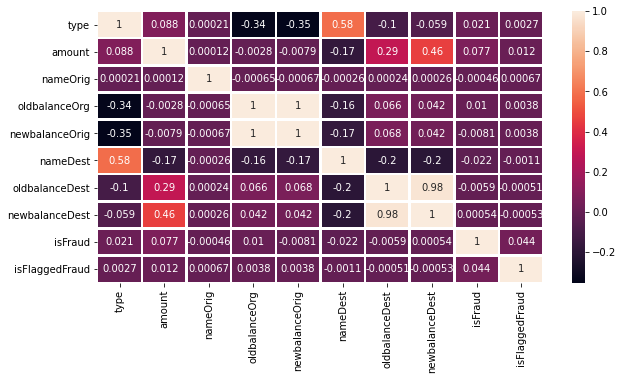

In [7]:
Correlation = finInfo.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Correlation, xticklabels=Correlation.columns, yticklabels=Correlation.columns, annot=True, linewidth = 1.5)
Correlation.sort_values(by=["isFraud"],ascending=False,inplace=True)
Correlation["isFraud"][1:]

In [8]:
y = finInfo['isFraud']
X = finInfo.drop(['isFraud','newbalanceDest','nameOrig','oldbalanceDest','newbalanceOrig'], axis = 1)
X.head()

,type,amount,oldbalanceOrg,nameDest,isFlaggedFraud
0,3,9839.64,170136.0,1662094,0
1,3,1864.28,21249.0,1733924,0
2,4,181.00,181.0,439685,0
3,1,181.00,181.0,391696,0
4,3,11668.14,41554.0,828919,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#https://stackoverflow.com/questions/62003285/how-can-we-find-the-optimum-k-value-in-k-nearest-neighbor

k_range = [1,3,5,7,9,11,13,15,17,19,21]
accuracies = []
for k in k_range:
    knnFeatureExtract = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knnFeatureExtract, X_train, y_train, cv=3, scoring = 'roc_auc')
    average = cv_scores.mean()
    accuracies.append(average)
    print("K value = " + str(k) + " and the score average is " +str(average))

# weight_options = ["uniform", "distance"]
# knnFeatureExtract = KNeighborsClassifier()
# param_grid = dict(n_neighbors = k_range, weights = weight_options)
# grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy')
# grid.fit(X_train,y_train)
# print(grid.best_params_)


K value = 1 and the score average is 0.7848490552965955
K value = 3 and the score average is 0.844771780513608
K value = 5 and the score average is 0.8751461467354528
K value = 7 and the score average is 0.89197883662061
K value = 9 and the score average is 0.9039792986798266
K value = 11 and the score average is 0.9137251576457855
K value = 13 and the score average is 0.9211259203249821
K value = 15 and the score average is 0.9280781953746198
K value = 17 and the score average is 0.9335190849648559
K value = 19 and the score average is 0.9382845893268685
K value = 21 and the score average is 0.9413165329044663


In [18]:
k_range2 = list(range(22,50))
for k in k_range2:
    if k % 2 != 0:
        knnFeatureExtract = KNeighborsClassifier(n_neighbors = k)
        cv_scores = cross_val_score(knnFeatureExtract, X_train, y_train, cv=3, scoring = 'roc_auc')
        average = cv_scores.mean()
        accuracies.append(average)
        print("K value = " + str(k) + " and the score average is " +str(average))

K value = 23 and the score average is 0.9441285725564796
K value = 25 and the score average is 0.9467887818607242
K value = 27 and the score average is 0.9498284254991424
K value = 29 and the score average is 0.9518890458066983
K value = 31 and the score average is 0.9537298574650103
K value = 33 and the score average is 0.9558714544382085
K value = 35 and the score average is 0.9577084182398893
K value = 37 and the score average is 0.9600706581603865
K value = 39 and the score average is 0.9622990131179839
K value = 41 and the score average is 0.9636221140095419
K value = 43 and the score average is 0.9653145978682405
K value = 45 and the score average is 0.9663366553257089
K value = 47 and the score average is 0.967429819843134
K value = 49 and the score average is 0.9686812699320434


Best k value is 49 with error 0.9686812699320434


Text(0.5, 1.0, 'ROC_AUC vs k')

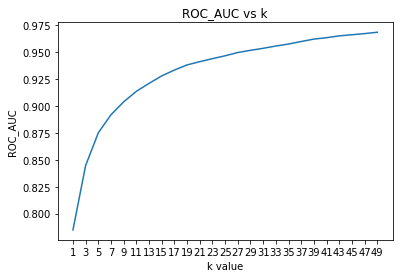

In [39]:
maxROC = max(accuracies)
indexOfMax = accuracies.index(maxROC)
k_range = [1,3,5,7,9,11,13,15,17,19,21]
k_range = k_range + ['23','25','27','29','31','33','35','37','39','41','43','45','47','49']
k_value = k_range[indexOfMax]
print("Best k value is " + str(k_value) + " with error " + str(maxROC) )
plt.plot(k_range,accuracies)
plt.xlabel("k value")
plt.ylabel("ROC_AUC")
plt.title("ROC_AUC vs k")


In [33]:
#check the square root of n method for optimal k selection
import math
n = X_train.shape[0]
optimal_k = math.ceil(math.sqrt(n))
print(optimal_k)


2257


In [34]:
#failed because theres not enough RAM in the system
knnFeatureExtract = KNeighborsClassifier(n_neighbors=optimal_k)
knnFeatureExtract.fit(X_train,y_train)
y_pred = knnFeatureExtract.predict(X_test)

MemoryError: Unable to allocate 21.4 GiB for an array with shape (1272524, 2257) and data type float64

In [10]:
knnFeatureExtract = KNeighborsClassifier(n_neighbors=49)
knnFeatureExtract.fit(X_train,y_train)
y_pred = knnFeatureExtract.predict(X_test)

0.9991695245040565
ROC_AUC_SCORE: 0.9716234667421346


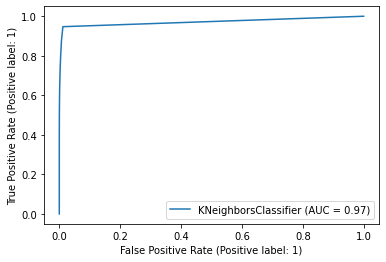

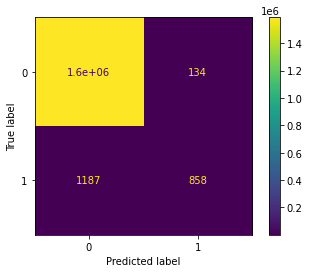

In [11]:
print(accuracy_score(y_test, y_pred))
y_pred_prob = knnFeatureExtract.predict_proba(X_test)
print("ROC_AUC_SCORE:",roc_auc_score(y_test,y_pred_prob[:,1]))
metrics.plot_roc_curve(knnFeatureExtract, X_test, y_test)
plot_confusion_matrix(knnFeatureExtract, X_test, y_test) 